## Importing Libraries

In [1]:
import cv2
import tensorflow as tf
import os 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
img_array = cv2.imread("Dataset/Face_Mask/01_Mask.jpg")

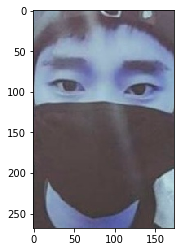

In [3]:
plt.imshow(img_array) #BGR

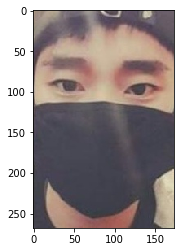

In [4]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [5]:
img_array.shape

(268, 173, 3)

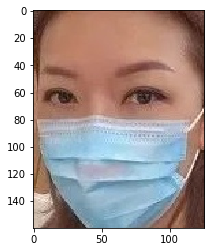

In [6]:
Datadirectory = "Dataset/" #training dataset
Classes = ["Face_Mask", "No_Mask"] #List of classes
for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        ##backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

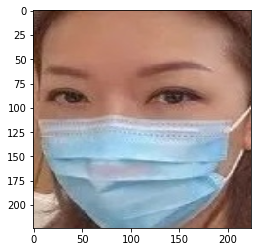

In [7]:
img_size = 224 ##imagenet ==>224

new_array =cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

## Reading images and converting all to array

In [8]:
training_data = [] ##data 

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_data))

220


In [11]:
import random 

random.shuffle(training_data)

In [12]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
    
X = np.array(x).reshape(-1,img_size,img_size,3)

In [13]:
X.shape

(220, 224, 224, 3)

In [14]:
#normalize the data 
X=X/255.0; 

In [15]:
Y = np.array(y)

## deep learning model for training - Transfer training

In [17]:
from tensorflow import keras 
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet() ##pre-trained-model

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

## Transfer Learning - Tuning, weights will start from last check point

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## Settings for binary classification (Face Mask/ Without Mask)

In [25]:
new_model.compile(loss = "binary_crossentropy", optimizer ="adam", metrics = ["accuracy"])

In [28]:
new_model.fit(X,Y,epochs =2, validation_split =0.1)

Epoch 1/2
7/7 [==============================] - 197s 22s/step - loss: 0.0209 - accuracy: 0.9949 - val_loss: 5.2992 - val_accuracy: 0.7727
Epoch 2/2
7/7 [==============================] - 145s 21s/step - loss: 0.1905 - accuracy: 0.9798 - val_loss: 0.8082 - val_accuracy: 0.9545


In [29]:
new_model.save('my_model.h11')

INFO:tensorflow:Assets written to: my_model.h11\assets


INFO:tensorflow:Assets written to: my_model.h11\assets


In [26]:
new_model = tf.keras.models.load_model('my_model.h11')

## Checking the network for prediction

In [27]:
frame = cv2.imread("00.jpg")

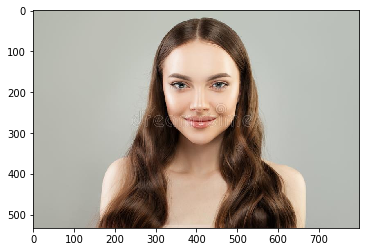

In [28]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [29]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [30]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [31]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex +ew]

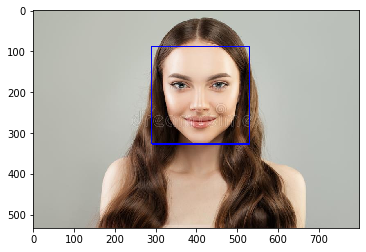

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [33]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image =final_image/255.0

In [34]:
Predictions = new_model.predict(final_image)

In [35]:
Predictions

array([[1.]], dtype=float32)

## Real Time Face Mask Detection

In [37]:
import cv2     # pip install opencv-python
               # pip install opencv-contrib-python     for full package
               # from deepface import DeepFace        pip install deepface
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# make a black image
img = np.zeros((500,500))

# set some text
text = "Some text in a box"

# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# set teh text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(-1)
# Check if the webcam is opend correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("No Face Detected")
        else:
            print("Face Detected")
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]    # cropping the face
    
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (Predictions>0.5):
        status = "No Mask"
        print("No Mask on the face")
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    else:
        status = "Face Mask"
        print("Face Mask Detected")
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0))
    
    # Draw rectangle around the faces
    # for (x,y,w,h) in faces:
    #     cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
    
    # Use puttext() method for inserting text on video
    
    cv2.imshow('Face Mask Detection Tutorial', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        

cap.release()
cv2.destroyAllWindows()


Face Detected
No Mask on the face
Face Detected
No Mask on the face
Face Detected
No Mask on the face
Face Detected
No Mask on the face
No Face Detected
Face Detected
No Mask on the face
Face Detected
No Mask on the face
Face Detected
Face Mask Detected
Face Detected
Face Mask Detected
Face Detected
Face Mask Detected
Face Detected
Face Mask Detected
Face Detected
Face Mask Detected
Face Detected
Face Mask Detected
Face Detected
Face Mask Detected
Face Detected
Face Mask Detected
Face Mask Detected
Face Detected
No Mask on the face
Face Detected
No Mask on the face
